In [1]:
#siff (fbp)
#feat 640 with 0.75 mae 0.128280769925
#feat 640 with 0.55 mae 0.134560355948
#feat 816 with 0.80 mae 0.122912618764 {lr': 0.12, 'min_samp_leaf': 4, 'n_est': 400, 'min_samp_split': 4, 'md': 7}
#feat 1744  0.131911446169 {'loss': 'ls', 'learning_rate': 0.109, 'min_samples_leaf': 4, 
#'n_estimators': 500, 'min_samples_split': 4, 'max_depth': 7}

#feat 1120_2b 0.119567786613
#{'loss': 'ls', 'learning_rate': 0.12, 'min_samples_leaf': 4, 'n_estimators': 500, 
#'min_samples_split': 4, 'max_depth': 5}

#fbp_1120_2b  0.12677624735
#{'loss': 'ls', 'learning_rate': 0.12, 'min_samples_leaf': 5, 'n_estimators': 400, 
# 'min_samples_split': 5, 'max_depth': 6}

#SOAP

In [1]:
import numpy as np
from sklearn import preprocessing
import re
import os
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
#enert= np.load('../fbp_features/bg_1120.npy')
enert= np.loadtxt('../SOAP_features/id_bandgap.csv', delimiter=',')[:,1]
G= np.load('../SOAP_features/soap_10_4_4_500_sparse_false.npy')
g_st= preprocessing.MaxAbsScaler().fit_transform(G)
G_scaled= g_st
E=np.reshape(enert,(len(enert),1))

mixer= np.array(range(G_scaled.shape[0]))
for _ in range(10000):
    np.random.shuffle(mixer)
n= int(len(mixer)*0.80) # marking the 90%
G_train_scaled= G_scaled[mixer[:n]]
G_vali_scaled= G_scaled[mixer[n:]]
E_train= E[mixer[:n]]
E_vali= E[mixer[n:]]
trai_id= mixer[:n]
vali_id= mixer[n:]

In [7]:
print G.shape

(2400, 500)


In [3]:
n_estimators= [400, 450, 500, 550]
max_depth= [5, 6, 7]
learning_rate= [ 0.09, 0.109, 0.119]
min_samp= [ 4, 5, 6]
#n_estimators= [ 400, 500]
#max_depth= [5, 7, 9]
#learning_rate= [0.109, 0.12, 0.15]
#min_samp= [4]
parameters_arra= []
mae_arra= []
for ne in n_estimators:
    for md in max_depth:
        for lr in learning_rate:
            for ms in min_samp:
        
                params = {'n_estimators': ne, 'max_depth': md, 'min_samples_split': ms,
                          'learning_rate': lr, 'loss': 'ls', 'min_samples_leaf':ms}
                parameters_arra.append(params)
                clf = ensemble.GradientBoostingRegressor(**params)

                clf.fit(G_train_scaled, E_train)
                mae_arra.append(mean_absolute_error(E_vali, clf.predict(G_vali_scaled)))
            
mae_arra= np.array(mae_arra)

/home/accounts/zeledon/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
id_para= np.argsort(mae_arra)
print mae_arra[id_para[0]]
print parameters_arra[id_para[0]]

0.112150784004
{'loss': 'ls', 'learning_rate': 0.119, 'min_samples_leaf': 4, 'n_estimators': 450, 'min_samples_split': 4, 'max_depth': 6}


In [5]:
for i in id_para:
    print mae_arra[i]
    print parameters_arra[i]
    print '****************'

0.112150784004
{'loss': 'ls', 'learning_rate': 0.119, 'min_samples_leaf': 4, 'n_estimators': 450, 'min_samples_split': 4, 'max_depth': 6}
****************
0.112298276467
{'loss': 'ls', 'learning_rate': 0.119, 'min_samples_leaf': 4, 'n_estimators': 400, 'min_samples_split': 4, 'max_depth': 6}
****************
0.112600565269
{'loss': 'ls', 'learning_rate': 0.109, 'min_samples_leaf': 5, 'n_estimators': 450, 'min_samples_split': 5, 'max_depth': 6}
****************
0.112667737101
{'loss': 'ls', 'learning_rate': 0.119, 'min_samples_leaf': 4, 'n_estimators': 500, 'min_samples_split': 4, 'max_depth': 6}
****************
0.112677357017
{'loss': 'ls', 'learning_rate': 0.09, 'min_samples_leaf': 5, 'n_estimators': 500, 'min_samples_split': 5, 'max_depth': 6}
****************
0.112716367392
{'loss': 'ls', 'learning_rate': 0.119, 'min_samples_leaf': 6, 'n_estimators': 400, 'min_samples_split': 6, 'max_depth': 7}
****************
0.112821296828
{'loss': 'ls', 'learning_rate': 0.119, 'min_samples_leaf

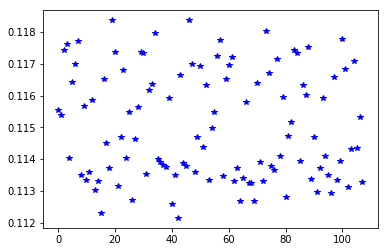

In [6]:
plt.plot(mae_arra, '*b')
plt.savefig('model_selection_soap_algaino_band_gap_mae_model.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [8]:
numb_feat='500'
exp_name='band_gap_algaino'
feat_type='soap'
enert= np.loadtxt('../SOAP_features/id_bandgap.csv', delimiter=',')[:,1]
G= np.load('../SOAP_features/soap_10_4_4_500_sparse_false.npy')
g_st= preprocessing.MaxAbsScaler().fit_transform(G)
print '*********************'
print 'g_st ', g_st.shape
print 'enert ', enert.shape
print '*********************'
print 'g_st ', g_st.shape
print 'enert ', enert.shape
np.save('g_scaled_%s_%s_%s'%(feat_type,numb_feat,exp_name), g_st)

*********************
g_st  (2400, 500)
enert  (2400,)
*********************
g_st  (2400, 500)
enert  (2400,)


In [9]:
#G_scaled= g_st[:20000,:]
#E=np.reshape(enert[:20000],(len(enert[:20000]),1))
G_scaled= g_st
E=np.reshape(enert,(len(enert),1))
print E.shape
print G_scaled.shape

mixer= np.array(range(G_scaled.shape[0]))
for _ in range(10000):
    np.random.shuffle(mixer)
n= int(len(mixer)*0.90) # marking the 90%
G_train_scaled= G_scaled[mixer[:n]]
G_vali_scaled= G_scaled[mixer[n:]]
E_train= E[mixer[:n]]
E_vali= E[mixer[n:]]
trai_id= mixer[:n]
vali_id= mixer[n:]
print 'G_train_scaled->', G_train_scaled.shape
print 'G_vali_scaled->', G_vali_scaled.shape
print 'E_train->', E_train.shape
print 'E_vali->', E_vali.shape

np.save('E_targ_%s_%s_%s'%(feat_type,numb_feat,exp_name), E)
np.save('trai_id_%s_%s_%s'%(feat_type,numb_feat,exp_name), trai_id)
np.save('vali_id_%s_%s_%s'%(feat_type,numb_feat,exp_name), vali_id)

(2400, 1)
(2400, 500)
G_train_scaled-> (2160, 500)
G_vali_scaled-> (240, 500)
E_train-> (2160, 1)
E_vali-> (240, 1)


In [10]:

#params = parameters_arra[id_para[0]]
params= {'loss': 'ls', 'learning_rate': 0.119, 'min_samples_leaf': 4, 
         'n_estimators': 450, 'min_samples_split': 4, 'max_depth': 6}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(G_train_scaled, E_train)
mse = mean_squared_error(E_vali, clf.predict(G_vali_scaled))
mae= mean_absolute_error(E_vali, clf.predict(G_vali_scaled))
print("val MSE: %.4f MAE %.4f" % (mse,mae))
mse = mean_squared_error(E_train, clf.predict(G_train_scaled))
mae= mean_absolute_error(E_train, clf.predict(G_train_scaled))
print("tra MSE: %.4f MAE %.4f" % (mse,mae))

val MSE: 0.0372 MAE 0.1153
tra MSE: 0.0009 MAE 0.0034


In [4]:
mse = mean_squared_error(E_vali, clf.predict(G_vali_scaled))
mae= mean_absolute_error(E_vali, clf.predict(G_vali_scaled))
print("val MSE: %.7f MAE %.5f" % (mse,mae))
mse = mean_squared_error(E_train, clf.predict(G_train_scaled))
mae= mean_absolute_error(E_train, clf.predict(G_train_scaled))
print("tra MSE: %.7f MAE %.5f" % (mse,mae))

val MSE: 0.0570211 MAE 0.13616
tra MSE: 0.0000159 MAE 0.00155


In [11]:
Ep= clf.predict(g_st)
np.save('E_pred_%s_%s_%s'%(feat_type,numb_feat,exp_name), Ep)

In [8]:
def RMSLE(y_t, y_p):
    x= np.average(np.log10(np.divide(np.add(y_p, 1.0), np.add(y_t, 1.0)))**2.0)
    return x**0.5

In [9]:
print RMSLE(E_vali, clf.predict(G_vali_scaled))

0.197364535667


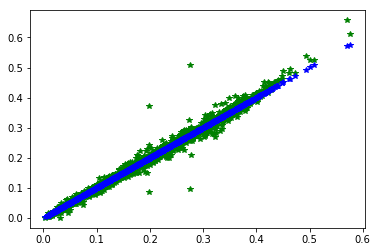

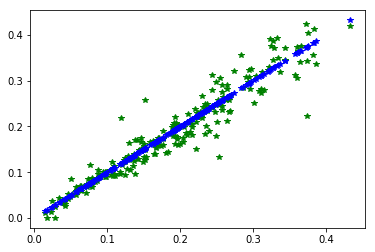

MSE: 0.0002


In [5]:
Ebr_vali= clf.predict(G_vali_scaled)

Ebr_train= clf.predict(G_train_scaled)

plt.plot(Ebr_train, np.squeeze(E_train), '*g', Ebr_train, Ebr_train, '*b')
plt.show()

plt.plot(Ebr_vali, np.squeeze(E_vali), '*g', Ebr_vali, Ebr_vali, '*b')
plt.show()

mse = mean_squared_error(E_train, clf.predict(G_train_scaled))
print("MSE: %.4f" % mse)

In [8]:
print E_vali.shape
E_vali1d= np.squeeze(E_vali)

(240, 1)


In [9]:
E_b= clf.predict(G_vali_scaled)
print E_b.shape

(240,)


In [10]:
print np.average(np.abs(np.subtract(E_vali1d, E_b)))

0.020570270253


0.409292406049
7.72510498391e-06
0.020570270253


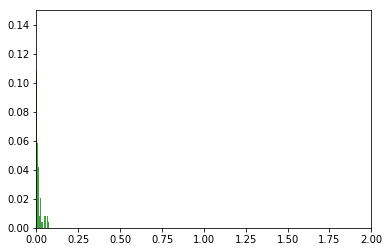

In [11]:
diff_vali= np.abs(np.subtract(Ebr_vali, np.squeeze(E_vali)))
print np.max(diff_vali)
print np.min(diff_vali)
diff_vali_aver= np.average(diff_vali)
print diff_vali_aver

n, bins, patches = plt.hist(diff_vali, 300, facecolor='g', alpha=0.75)
plt.axis([0.0, 2.0, 0, 0.15])
for item in patches:
    item.set_height(item.get_height()/sum(n))
plt.show()

In [65]:
np.save('../analysis/diff_vali_grad_bost_X_oni_48', diff_vali)

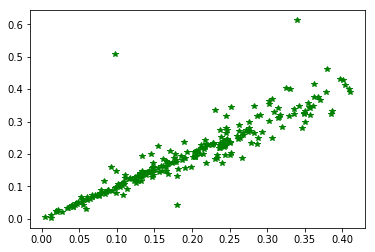

In [12]:
plt.plot(Ebr_vali, np.squeeze(E_vali), '*g')
plt.show()